## Análise básica dos links do Spotify

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df3 = pd.read_csv("../data/data_3.csv")
df4 = pd.read_csv("../data/data_4.csv")
df5 = pd.read_csv("../data/data_5.csv")
df6 = pd.read_csv("../data/data_6.csv")


df = pd.concat([df3, df4, df5, df6], join='inner')

df.head()

,SINCE_DATE,UNITIL_DATE,SPOTIFY_URL,TYPE_URL
0,MARCH,MARCH,https://open.spotify.com/track/2CNJMsnYnuOVog1...,track
1,MARCH,MARCH,https://track.adform.net/C/?bn=41279147%0A,other
2,MARCH,MARCH,https://open.spotify.com/track/6X7H3JTAUGAL1rS...,track
3,MARCH,MARCH,https://open.spotify.com/track/11OwAR3GlBj9E35...,track
4,MARCH,MARCH,https://open.spotify.com/track/4258fiEd2cnCC5d...,track


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8059 entries, 0 to 2369
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SINCE_DATE   8059 non-null   object
 1   UNITIL_DATE  8059 non-null   object
 2   SPOTIFY_URL  8059 non-null   object
 3   TYPE_URL     8059 non-null   object
dtypes: object(4)
memory usage: 314.8+ KB


Coletando apenas URLS do Spotify

In [56]:
query_url = df["SPOTIFY_URL"].apply(lambda x : 1 if ("spotify" in x) else 0)

In [57]:
df.drop(query_url, inplace=True)

In [58]:
df.head()

,SINCE_DATE,UNITIL_DATE,SPOTIFY_URL,TYPE_URL
2,MARCH,MARCH,https://open.spotify.com/track/6X7H3JTAUGAL1rS...,track
3,MARCH,MARCH,https://open.spotify.com/track/11OwAR3GlBj9E35...,track
4,MARCH,MARCH,https://open.spotify.com/track/4258fiEd2cnCC5d...,track
5,MARCH,MARCH,https://open.spotify.com/track/0M955bMOoilikPX...,track
6,MARCH,MARCH,https://open.spotify.com/track/6m5ucBSM6b5saQv...,track


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8051 entries, 2 to 2369
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SINCE_DATE   8051 non-null   object
 1   UNITIL_DATE  8051 non-null   object
 2   SPOTIFY_URL  8051 non-null   object
 3   TYPE_URL     8051 non-null   object
dtypes: object(4)
memory usage: 314.5+ KB


In [60]:
type_url = df.groupby("TYPE_URL").size().reset_index(name='COUNT').sort_values(["COUNT"], ascending=False)
type_url

,TYPE_URL,COUNT
4,track,5723
3,playlist,929
0,album,837
2,other,467
1,artist,95


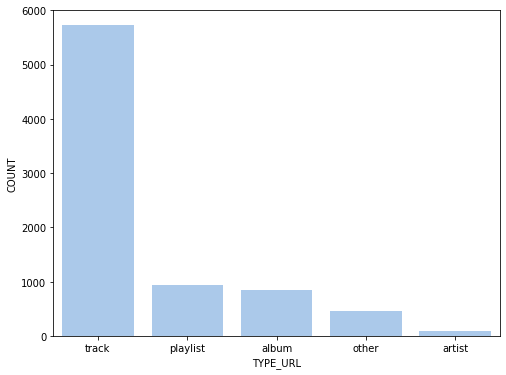

In [61]:
plt.subplots(figsize=(8, 6))

sns.set_color_codes("pastel")
sns.barplot(x="TYPE_URL", y="COUNT", data=type_url,
            label="Total", color="b")
plt.show()

## Trabalhando com a API do Spotify

In [62]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [63]:
SPOTIPY_CLIENT_ID = "b391ac85c601490c97f5543085f9421c"
SPOTIPY_CLIENT_SECRET = "bc62935c90c242e0ab32ee08a2e5c404"

sp = spotipy.Spotify(client_credentials_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET))

Coletando apenas as urls de música. Estas são identificadas pelo termo **track** na string.

In [67]:
track_df = df[ df["TYPE_URL"] == "track" ]
track_df.head()

,SINCE_DATE,UNITIL_DATE,SPOTIFY_URL,TYPE_URL
2,MARCH,MARCH,https://open.spotify.com/track/6X7H3JTAUGAL1rS...,track
3,MARCH,MARCH,https://open.spotify.com/track/11OwAR3GlBj9E35...,track
4,MARCH,MARCH,https://open.spotify.com/track/4258fiEd2cnCC5d...,track
5,MARCH,MARCH,https://open.spotify.com/track/0M955bMOoilikPX...,track
6,MARCH,MARCH,https://open.spotify.com/track/6m5ucBSM6b5saQv...,track


In [68]:
track_list = track_df["SPOTIFY_URL"].to_list()
track_list

['https://open.spotify.com/track/6X7H3JTAUGAL1rSwohnPBX?si=1r8su1tGRoKIM9Vb6Fqg2Q',
 'https://open.spotify.com/track/11OwAR3GlBj9E35Cznf7Lj?si=KvqjpjHeQsitUhBMMXFXEQ',
 'https://open.spotify.com/track/4258fiEd2cnCC5d6F7nfUz?si=VV0Cg6s4RH286aRZe98Y-w',
 'https://open.spotify.com/track/0M955bMOoilikPXwKLYpoi?si=NDcOZ3CpTF6q-5s--kFjXA',
 'https://open.spotify.com/track/6m5ucBSM6b5saQvwlrxDZh?si=7KCnmihVRsmjJfOK7QSzDw',
 'https://open.spotify.com/track/6smuFW92PmTdqKQnIoV6cn?si=Q5Pehfa5SfyLRZAy7Kvo7Q',
 'https://open.spotify.com/track/53jbdPQBaH6WaQvW0zmGBs?si=pE69ygTzQDuQonrEr7uLLw',
 'https://open.spotify.com/track/35689kbAwieHK4YNmwEisS?si=Y8YQdp7qQbC4uGnIO5EQ2g',
 'https://open.spotify.com/track/3hn7hzXAbrOjUXN8XNwy5M?si=cJ-EW0HIS7S0HMrg2vTI0g',
 'https://open.spotify.com/track/0OCm8tJMJCksjHowJF0KG1?si=Xf0FnLKuT2GFdjzaAaW8sw',
 'https://open.spotify.com/track/5NQJnRpJHRaupdegphntQT?si=Ci2CZOZiS6iOYnczaHRU_A',
 'https://open.spotify.com/track/0wGaciQY0aNrCuVbMWw728?si=AAIcUjeGSFGq6tvOs

In [ ]:
list_spotify_data = []

for url in track_list:
    audio_features = sp.audio_features(url)[0]
    artist_info = sp.track(audio_features["id"])
    
    audio_features["popularity"] = artist_info["popularity"]
    audio_features["music_name"] = artist_info["name"]
    audio_features["artist"] = artist_info["artists"][0]["name"]
   
    list_spotify_data.append(audio_features)

## Criando um dataframe apenas com os dados das músicas coletadas

In [ ]:
df = pd.DataFrame(lista)
df.head()

In [ ]:
df.columns

In [ ]:
df.groupby("artist").size().reset_index(name='count').sort_values(["count"], ascending=False)